In [96]:
# Importaciones
import numpy as np
import matplotlib.pyplot as plt
import csv as csv
import os
import urllib.request
import pandas as pd
from itertools import product

In [109]:
#Red neuronal 

# Función de activación sigmoide
def sigmoid(x):
   # x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide
def sigmoid_derivative(x):
    # return sigmoid(x) * (1 - sigmoid(x))
    return x * (1 - x)

# Establece la semilla para la generación de números aleatorios
def seed(random_state=33):
    np.random.seed(random_state)

def xavier_initialization(input_size, output_size):
    # TODO: Implementar inicialización de Xavier
    limit = np.sqrt(6 / (input_size + output_size))
    W = np.random.uniform(-limit, limit, (output_size, input_size))
    return W


def create_minibatches(X, y, batch_size):
    """
    Genera los lotes de datos (batchs) de acuerdo al parámetro batch_size de forma aleatoria para el procesamiento. 
    """
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)  # Mezcla los índices aleatoriamente
    X_shuffled, y_shuffled = X[indices], y[indices]  # Reordena X e y según los índices aleatorios
    
    # Divide los datos en minibatches
    for X_batch, y_batch in zip(np.array_split(X_shuffled, np.ceil(n_samples / batch_size)), 
                                np.array_split(y_shuffled, np.ceil(n_samples / batch_size))):
        yield X_batch, y_batch

    
class MLP_TODO:
    error_epocas = []
    error_epocas_bach = []
    error_bach_total = []
    def __init__(self, num_entradas, num_neuronas_ocultas, num_salidas, epochs, batch_size=128, learning_rate=0.2, random_state=33,initialization="xavier"):

        # Establecer la semilla para la generación de números aleatorios
        seed(random_state)
        # Definir la tasa de aprendizaje
        self.learning_rate = learning_rate
        # Definir el número de épocas
        self.epochs = epochs
        # Definir el tamaño del batch de procesamiento
        self.batch_size = batch_size
        
        if initialization == "xavier":
            # definir las capas con la inicialización de xavier
            self.W1 = xavier_initialization(num_neuronas_ocultas, num_entradas)  # Pesos entre capa de entrada y capa oculta
            self.b1 = np.zeros((1, num_neuronas_ocultas))   # Bias de la capa oculta
            self.W2 = xavier_initialization(num_salidas,num_neuronas_ocultas)  # Pesos entre capa oculta y capa de salida
            self.b2 = np.zeros((1, num_salidas)) # Bias de la capa de salida

        elif initialization == "normal":
            # Pesos entre capa de entrada y capa oculta
            self.W1 = np.random.normal(0, 1, size=(num_entradas, num_neuronas_ocultas))
            self.b1 = np.zeros((1, num_neuronas_ocultas))
            
            # Pesos entre capa oculta y capa de salida
            self.W2 = np.random.normal(0, 1, size=(num_neuronas_ocultas, num_salidas))
            self.b2 = np.zeros((1, num_salidas))

            
    def forward(self, X):
       
        # TODO: implementar el forward pass
        #----------------------------------------------
        # 1. Propagación hacia adelante (Forward pass)
        #----------------------------------------------
        # TODO: Calcular la suma ponderada Z (z_c1) para la capa oculta 
        self.X = X
        self.z_c1 = self.X @ self.W1 + self.b1
        # TODO: Calcular la activación de la capa oculta usando la función sigmoide
        self.a_c1 = sigmoid(self.z_c1)
        # TODO: Calcular la suma ponderada Z (z_c2)  para la capa de salida 
        self.z_c2 = self.a_c1 @ self.W2 + self.b2 
        # TODO: Calcular la activación de la capa de salida usando la función sigmoide
        y_pred = sigmoid(self.z_c2)
       
        return y_pred
    

    def loss_function_MSE(self, y_pred, y):
        #----------------------------------------------
        # 2. Cálculo del error con MSE
        #----------------------------------------------
        # TODO: Calcular el error cuadrático medio (MSE)
        self.y_pred = y_pred
        self.y = y
        error = 0.5 * np.mean((y_pred - y) ** 2)
        return error
    

    def backward(self):
        # TODO: implementar el backward pass
        # calcular los gradientes para la arquitectura de la figura anterior
        #----------------------------------------------
        # 3. Propagación hacia atrás (Backward pass)
        #----------------------------------------------
        
        #----------------------------------------------
        # Gradiente de la salida
        #----------------------------------------------
        # TODO: Calcular la derivada del error con respecto a la salida y
        dE_dy_pred = self.y_pred - self.y # Derivada del error respecto a la predicción con  N ejemplos
        # TODO: Calcular la derivada de la activación de la salida con respecto a z_c2 
        d_y_pred_d_zc2 = sigmoid_derivative(self.y_pred)
        # TODO: Calcular delta de la capa de salida
        delta_c2 = dE_dy_pred * d_y_pred_d_zc2

        #----------------------------------------------
        # Gradiente en la capa oculta
        #----------------------------------------------
        # calcular la derivada de las suma ponderada respecto a las activaciones de la capa 1
        d_zc2_d_a_c1 =  delta_c2 @ self.W2.T
        # TODO: Propagar el error hacia la capa oculta, calcular deltas de la capa 1
        delta_c1 = d_zc2_d_a_c1 * sigmoid_derivative(self.a_c1)

        #calcula el gradiente de la función de error respecto a los pesos de la capa 2
        self.dE_dW2 = self.a_c1.T @ delta_c2
        self.dE_db2 = np.sum(delta_c2, axis=0, keepdims=True)
        self.dE_dW1 = self.X.T @ delta_c1
        self.dE_db1 = np.sum(delta_c1, axis=0, keepdims=True)
                                    #Pag. 52

    def update(self):  # Ejecución de la actualización de paramámetros
        # TODO: implementar la actualización de los pesos y el bias
        #----------------------------------------------
        # Actualización de pesos de la capa de salida
        #---------------------------------------------- 
        
        # TODO: Actualizar los pesos y bias de la capa de salida
        self.W2 = self.W2 - self.learning_rate * self.dE_dW2
        self.b2 = self.b2 - self.learning_rate * self.dE_db2

        #----------------------------------------------
        # Actuailzación de pesos de la capa oculta
        #----------------------------------------------
        #calcula el gradiente de la función de error respecto a los pesos de la capa 1
        self.W1 = self.W1 - self.learning_rate * self.dE_dW1
        self.b1 = self.b1 - self.learning_rate * self.dE_db1

    def predict(self, X):  # Predecir la categoría para datos nuevos
        # TODO: implementar la predicción 
        y_pred = self.forward(X)
        # Obtener la clase para el clasificador binario
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        return y_pred

    def train(self, X, Y):
        self.error_epocas.clear()
        #implementar el entrenamiento de la red
        for epoch in range(self.epochs):
            num_batch = 0
            epoch_error  = 0
            for X_batch, y_batch in create_minibatches(X, Y, self.batch_size):
                y_pred = self.forward(X_batch)
                error = self.loss_function_MSE(y_pred, y_batch)
                epoch_error += error    
                self.backward() # cálculo de los gradientes
                self.update() # actualización de los pesos y bias
                num_batch += 1
            if epoch % 100 == 0:
                    self.error_epocas.append(epoch_error/num_batch)
                    print(f"Época {epoch}, Error: {epoch_error/num_batch}")
                    
                    #Una bandera para que si el error no evoluciona no siga el entrenamiento.
                    if epoch == 200:
                        if (epoch_error/num_batch) > .01:
                                return self.error_epocas   

                    if epoch == 2000:
                        if (epoch_error/num_batch) > .0015:
                                return self.error_epocas   
                        
        return self.error_epocas
        

In [98]:
#Graficar

def graficar(error):
        # Si el usuario pasa una métrica única (float) se muestra como barra. 
        if type(error) == float:
                error = error * 100
                fig, ax = plt.subplots(figsize=(4, 6))  # Hacemos la gráfica más estilizada
                bars = ax.bar(["Métrica"], [error], color="skyblue")

                #Etiquetas 
                #plt.xlabel("Metrica.")
                plt.ylabel("Nivel de exito.")
                plt.title(f"Métrica de desempeño del {round(error, 4)}%")
                ax.set_ylim(0, 100)

                # ax.grid(True)
                plt.tight_layout()
                plt.show()        
                return
        
        # Si es lista/array: trazamos la curva de aprendizaje
        errores_MSE = error
        epochs = range(1, len(errores_MSE) + 1)
        epochs = [f*100 for f in epochs]
        # Crear una nueva figura
        
        plt.figure(figsize=(16,7))

        # Graficar la curva de aprendizaje.
        # datos tabulares para el eje epocas =x; eje y = errores
        plt.plot(epochs, errores_MSE, marker='o')
        #Indico que me marque todas las etiquetas.
        #plt.xticks(epochs)

        #Etiquetas 
        plt.xlabel("Epoca")
        plt.ylabel("Error (Error cuadrático medio)")
        plt.title("Curva de aprendizaje - MAE")

        #Visualizamos la grafica.
        plt.grid(True)
        plt.show()


In [99]:
#Leer dataset

def read_dataset(opcion_lectura,dataset):
    adress_dataset = ''
    X = []
    T = []
    URL = "https://raw.githubusercontent.com/octaviioViego/redes_neuronales_entrenamiento_basico/main/data/"

    if opcion_lectura == "train":

        if dataset == "cancer":
            FILE = "breast_cancer_train.csv"
            URL = URL + FILE
        
        elif dataset == "iris":
            FILE = "iris_train.csv"
            URL = URL + FILE
        
        elif dataset == "wine":
            FILE = "wine_train.csv"
            URL = URL + FILE
        
        if not os.path.exists(FILE):
                urllib.request.urlretrieve(URL,FILE)

        adress_dataset = './' + FILE
    
    elif opcion_lectura == "test":

        if dataset == "cancer":
            FILE = "breast_cancer_test.csv"
            URL = URL + FILE
        
        elif dataset == "iris":
            FILE = "iris_test.csv"
            URL = URL + FILE
        
        elif dataset == "wine":
            FILE = "wine_test.csv"
            URL = URL + FILE
        
        if not os.path.exists(FILE):
                urllib.request.urlretrieve(URL,FILE)

        adress_dataset = './' + FILE
   
    else:
        print(f"Opción '{opcion_lectura}' no encontrada")
    
    with open(adress_dataset,newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
     for row in spamreader:
           T.append(row[-1])
           X.append(row[:-1])
         
    T.pop(0)
    X.pop(0)

    return X,T



In [100]:
#Normalización (estandarización)
def normalizacion_dataset_Zcore(data):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    data_std = (data - mean) / std
    return data_std

In [101]:
#Métrica
def fun_accuracy(etiqueta,prediccion):
     num_aciertos = 0
     for i in range(0,len(prediccion)):
          if prediccion[i] == etiqueta[i]:
               num_aciertos +=1
     aciertos = num_aciertos/len(etiqueta)
     print("Métrica de desempeño")
     print(f"Accuracy: {aciertos}, Porcentaje: {aciertos*100}%")
     return aciertos


In [102]:
# Convinaciones
# mis variables son: 1- Neuronas en capa oculta 2, 4, 8, 16, 32, 128
#                    2- Inicializacion Distribucion Normal / Xavier
#                    3- Normalizacion de datos Sin normalizar / Normalizacion z-score
#                    4- Learning rate 0.01, 0.1, 0.5
#                    5- Batch size 8, 16, 32, 64
#                    6- Num.epocas (epochs) 10,000 (Se puede reducir si el algoritmo converge antes, para fines
#                       de visualizacion)


def combinaciones():
    confi_capa_oculta = {2, 4, 6, 8, 16, 32, 128}
    confi_normaluzacion_datos={"Sin_normalizar", "Normalizacion_z-score"}
    confi_inicializacion_distribucion = {"normal","xavier"} #normal = 1 xavier = 2
    confi_learning_rate_lista={0.01, 0.1, 0.5}
    confi_Batch_size = {8, 16, 32, 64}
    #Crea una lista de combinaciones de acuerdo a las listas con parametros que le indiquemos.
    combinacion = list(product(
        confi_capa_oculta,
        confi_normaluzacion_datos,
        confi_inicializacion_distribucion,
        confi_learning_rate_lista,
        confi_Batch_size,   
    ))
    return combinacion 

In [103]:
# Guardar datos en .csv

def importar_resultados(resultados,nombre_dataset):
    df = pd.DataFrame(resultados)
    #df.to_excel("resultados_entrenamiento.xlsx", index=False)
    df.to_csv(f"resultados_entrenamiento_{nombre_dataset}.csv", index=False)


In [104]:
# Leemos los 5 mejores o peores resultados.

def top_resultados(nombre_dataset,mejor_peor):

    # Leer tu archivo CSV
    URL = "./resultados_entrenamiento_" + nombre_dataset + ".csv"
    df = pd.read_csv(URL)

    # Asegurar que la columna Error sea numérica (por si vino como texto)
    df["Error"] = pd.to_numeric(df["Error"], errors="coerce")

    if mejor_peor == "mejor":
        # Top 5 con menor error
        top_menores = df.nsmallest(5, "Error")
 
        # # Mostrar en consola
        print(" Top 5 menores errores:")
        print(top_menores)
        return
    
    if mejor_peor == "peor":
        # Top 5 con mayor error
        top_mayores = df.nlargest(5, "Error")


        print("\n Top 5 mayores errores:")
        print(top_mayores)
        return
    


In [ ]:
#Main

#Agrego para guardar los resultados de las epocas
resultados = []
#Nombre del dataset que vamos a entrenar
nombre_dataset ="cancer" # cancer , iris , vino

X_Original , T = read_dataset("train",nombre_dataset) 
X_Original = np.array(X_Original , dtype=float)
T = np.array(T, dtype=int)
T = T.reshape(-1, 1) 

#Sacamos las combinaciones (Todas las posibles combinaciones) de entrenamiento.
todas_combinaciones = combinaciones() 
print(f"Total de combinaciones: {len(todas_combinaciones)}")

#Iniciamos a iterar sobre todo el conjunto de combinaciones.
for i in todas_combinaciones:
    X = X_Original.copy()
    normalizacion = "falso"
    #Leemos la configuracion de nuestras combinaciones
    capa_oculta = i[0]
    normalizacion_datos = i[1]
    inicializacion_distribucion_= i[2]
    learning_rate_ = i[3]
    batch_size_ = i[4]
    #Capa oculta
    neuronas_ocultas = int(capa_oculta)
    #Si tenemos que normalizar los datos aplicamos la formula, de lo contrario no hacemos nada
    if normalizacion_datos == "Normalizacion_z-score": 
        X = normalizacion_dataset_Zcore(X)
        normalizacion= "cierto"
    #Tasa se aprendizaje
    learning_rate = float(learning_rate_)
    #Bach de entrada
    batch_size = int(batch_size_)
    entradas = X.shape[1]
    salidas = T.shape[1]
    epochs = 5001
    semilla = 33

    clasificador =MLP_TODO(entradas, 
                            neuronas_ocultas, 
                            salidas, 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            learning_rate=learning_rate, 
                            random_state=semilla,
                            initialization=inicializacion_distribucion_)
        
    error = clasificador.train(X,T)
    
    # Tomamos el ultimo error como metrica
    error_final = float(error[-1])

    # Guardamos la configuraciones y el ultimo error del entrenamiento.
    resultados.append({
               "Error": error_final,
               "Entradas":entradas,
               "neuronas ocultas": neuronas_ocultas,
               "Salida":salidas,
               "Num epocas:": epochs,
               "Tamaño del batch": batch_size,
               "Tasa aprendizaje": learning_rate,
               "Semilla":semilla,
               "Inicializacion de parametros (W,B)": inicializacion_distribucion_,
               "Normalizacion Z_core (dataset)": normalizacion,
        })

importar_resultados(resultados,nombre_dataset)


Total de combinaciones: 336
Época 0, Error: 0.04749129181827123
Época 100, Error: 0.0021417236759172158
Época 200, Error: 0.0014698905671296563
Época 300, Error: 0.0012998388363049218
Época 400, Error: 0.001233134298798963
Época 500, Error: 0.0011991165962466654
Época 600, Error: 0.0011748117821595518
Época 700, Error: 0.0011600896103358008
Época 800, Error: 0.0011495987730689957
Época 900, Error: 0.0011420437464359965
Época 1000, Error: 0.0011362240391536668
Época 1100, Error: 0.0011316553684924079
Época 1200, Error: 0.0011281556595178386
Época 1300, Error: 0.0011249105924091827
Época 1400, Error: 0.001122365060267393
Época 1500, Error: 0.0011202451213683973
Época 1600, Error: 0.0011184106280981712
Época 1700, Error: 0.0011168213303834422
Época 1800, Error: 0.001115514332655744
Época 1900, Error: 0.001114244906617513
Época 2000, Error: 0.0011131382425731593
Época 2100, Error: 0.0011121829205031565
Época 2200, Error: 0.0011113129336054156
Época 2300, Error: 0.0011105374745716305
Época 

/tmp/ipython-input-417597236.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Época 100, Error: 0.12745051414397413
Época 200, Error: 0.12186597435963381
Época 0, Error: 0.12743660544267119
Época 100, Error: 0.12718530300154687
Época 200, Error: 0.12069687112206923
Época 0, Error: 0.13984498880800167
Época 100, Error: 0.1401505343505612
Época 200, Error: 0.12587358812299618
Época 0, Error: 0.181249114728298
Época 100, Error: 0.14651636164552398
Época 200, Error: 0.1431066517178695
Época 0, Error: 0.1715124760799543
Época 100, Error: 0.17300249154679342
Época 200, Error: 0.15779616513500594
Época 0, Error: 0.17286945977424034
Época 100, Error: 0.1869246580464963
Época 200, Error: 0.186493438956522
Época 0, Error: 0.18171929956274185
Época 100, Error: 0.18687788228302926
Época 200, Error: 0.18666651372376653
Época 0, Error: 0.27311701534350274
Época 100, Error: 0.313243984593336
Época 200, Error: 0.31330272370319984
Época 0, Error: 0.17457170056959656
Época 100, Error: 0.11850584238441182
Época 200, Error: 0.11736878952409645
Época 0, Error: 0.17380181070911666
Ép

In [111]:
# El top que queremos ver.
top = "mejor"
top_resultados(nombre_dataset,top)

 Top 5 menores errores:
        Error  Entradas  neuronas ocultas  Salida  Num epocas:  \
295  0.000002        30                 8       1         5001   
102  0.001076        30                 2       1         5001   
258  0.001077        30                 6       1         5001   
210  0.001077        30                 4       1         5001   
306  0.001077        30                 8       1         5001   

     Tamaño del batch  Tasa aprendizaje  Semilla  \
295                64               0.5       33   
102                32               0.5       33   
258                32               0.5       33   
210                32               0.5       33   
306                32               0.5       33   

    Inicializacion de parametros (W,B) Normalizacion Z_core (dataset)  
295                             normal                         cierto  
102                             normal                         cierto  
258                             xavier            

Época 0, Error: 0.03352478937013088
Época 100, Error: 0.0012990540672118572
Época 200, Error: 0.0011682971231806838
Época 300, Error: 0.0011365267546377684
Época 400, Error: 0.0011141331086126271
Época 500, Error: 0.00013897294217720248
Época 600, Error: 6.307912566352373e-05
Época 700, Error: 4.1803354506523725e-05
Época 800, Error: 3.098428463566479e-05
Época 900, Error: 2.426411013630914e-05
Época 1000, Error: 1.955791809197684e-05
Época 1100, Error: 1.6501241809247928e-05
Época 1200, Error: 1.4207840114322046e-05
Época 1300, Error: 1.2534272573561489e-05
Época 1400, Error: 1.1156647001490137e-05
Época 1500, Error: 1.0042354925472708e-05
Época 1600, Error: 9.094823267348322e-06
Época 1700, Error: 8.178358928765451e-06
Época 1800, Error: 7.331290071927763e-06
Época 1900, Error: 6.716089186474647e-06
Época 2000, Error: 6.179069430547936e-06
Época 2100, Error: 5.748005227159957e-06
Época 2200, Error: 5.3995074701963405e-06
Época 2300, Error: 5.0735087362707195e-06
Época 2400, Error: 4.

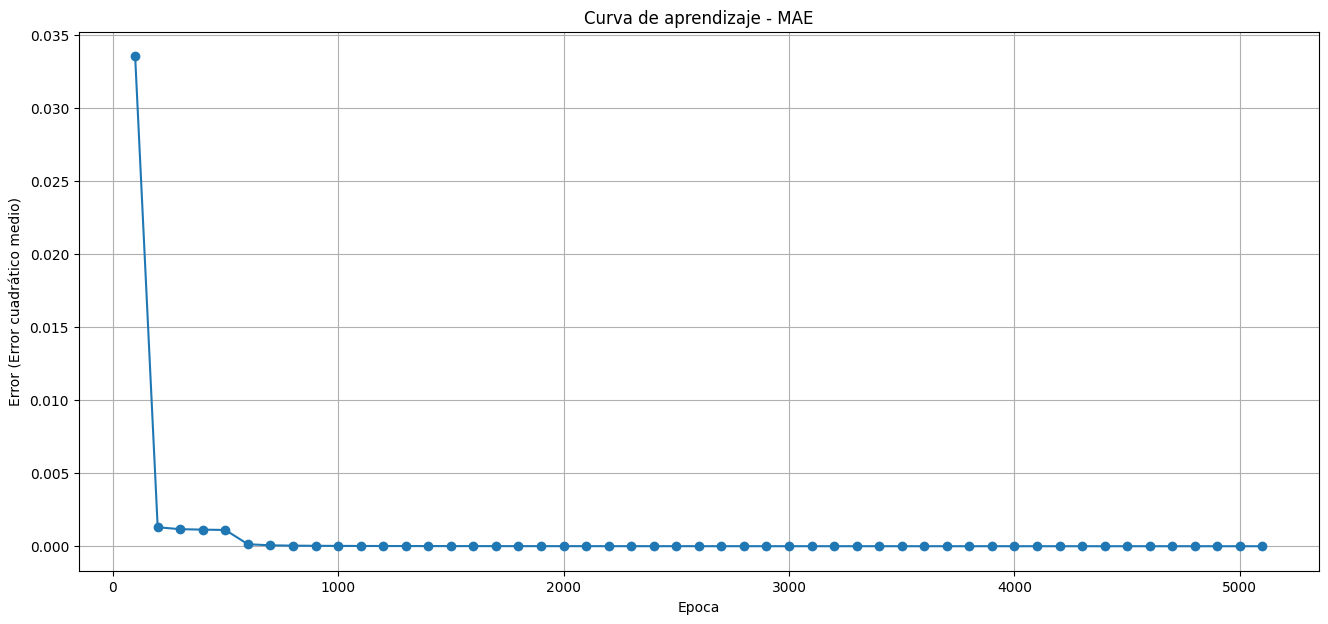

Métrica de desempeño
Accuracy: 0.956140350877193, Porcentaje: 95.6140350877193%


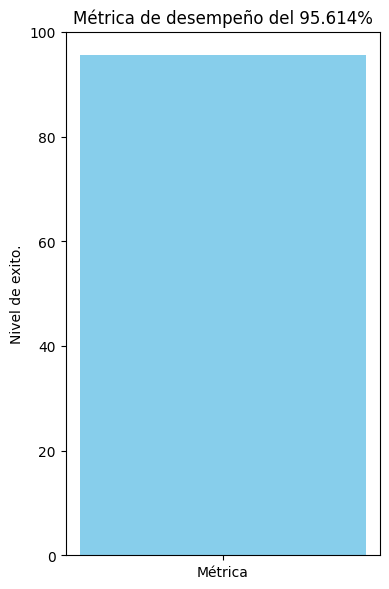

In [112]:
# Replicamos la operaciones unitarias.

#Variables para replicar el entrenamiento

#Nombre del dataset que vamos a entrenar
nombre_dataset ="cancer"

#Leemos la configuracion de nuestras combinaciones
capa_oculta = 8
normalizacion_datos = "Normalizacion_z-score"
inicializacion_distribucion_= "normal"
learning_rate_ = 0.5
batch_size_ = 64

#Capa oculta
neuronas_ocultas = int(capa_oculta)


# Empieza en entrenamiento
X , T = read_dataset("train",nombre_dataset)
X = np.array(X , dtype=float)
T = np.array(T, dtype=int)
T = T.reshape(-1, 1) 
normalizacion_aplicada = False

#Si tenemos que normalizar los datos aplicamos la formula, de lo contrario no hacemos nada
if normalizacion_datos == "Normalizacion_z-score": 
        X = normalizacion_dataset_Zcore(X)
        normalizacion_aplicada = True

#Tasa se aprendizaje
learning_rate = float(learning_rate_)
#Bach de entrada
batch_size = int(batch_size_)
entradas = X.shape[1]
salidas = T.shape[1]

epochs = 5001
semilla = 33

clasificador =MLP_TODO(entradas, 
                            neuronas_ocultas, 
                            salidas, 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            learning_rate=learning_rate, 
                            random_state=semilla,
                            initialization=inicializacion_distribucion_)
        
error = clasificador.train(X,T)
    
graficar(error)


#Metrica de desempeño
X,T =read_dataset("test",nombre_dataset)
X = np.array(X , dtype=float)

# entra si se aplico la normalización.
if normalizacion_aplicada:        
    X = normalizacion_dataset_Zcore(X)

X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)

T = np.array(T, dtype=int)
T = T.reshape(-1, 1) 
clasificador.predict(X)

Y = clasificador.predict(X)
metrica = fun_accuracy(T,Y)

graficar(metrica)